In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats
from sklearn.linear_model import Lasso

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)

### Carga de datos

In [4]:
# Load the CSV file
data_df = pd.read_csv("Filtered_Resultados_Saber_11.csv", sep=',')

# Display the first few rows of the dataframe
data_df.head()


,PERIODO,COLE_DEPTO_UBICACION,COLE_CALENDARIO,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,PUNT_GLOBAL,COLE_AREA_UBICACION
0,20112,META,A,No,No,No,No,NaN,URBANO
1,20142,META,A,Si,Si,Si,Si,332.0,URBANO
2,20142,META,A,No,Si,Si,Si,257.0,URBANO
3,20194,META,A,No,Si,No,Si,251.0,URBANO
4,20194,META,A,No,Si,No,Si,251.0,URBANO


## Tarea 2: Limpieza y alistamiento de datos

>2.1 Dimensión de Columnas y filas

>2.2 Verificación de tipos

>2.3 Columnas a Features

>2.4 Análisis de completitud

>2.5 Imputación variables objetivo

>2.6 Imputación variables categoricas

>2.7 Transformación Variables Categoricas a Dummies

>2.8 Mirando nuevamente las correlaciones

### 2.1 Dimensión de Columnas y filas

In [5]:
#Columnas y Filas
data_df.shape

(146006, 9)

### 2.2 Verificacion de tipos

In [6]:
#Verificación de tipos
data_df.dtypes


PERIODO                   int64
COLE_DEPTO_UBICACION     object
COLE_CALENDARIO          object
FAMI_TIENEAUTOMOVIL      object
FAMI_TIENECOMPUTADOR     object
FAMI_TIENEINTERNET       object
FAMI_TIENELAVADORA       object
PUNT_GLOBAL             float64
COLE_AREA_UBICACION      object
dtype: object

In [7]:
# Convertir las columnas categóricas de tipo 'object' a 'category'
categorical_columns = [
    'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET', 
    'FAMI_TIENELAVADORA', 'COLE_AREA_UBICACION', 'COLE_DEPTO_UBICACION', 
    'COLE_CALENDARIO'
]

for column in categorical_columns:
    data_df[column] = data_df[column].astype('category')

### 2.3 Columnas

In [8]:
#Columnas
data_df.columns
categorical_features = ["PERIODO","FAMI_TIENEAUTOMOVIL", "FAMI_TIENECOMPUTADOR", "FAMI_TIENEINTERNET", "FAMI_TIENELAVADORA", "COLE_AREA_UBICACION", "COLE_DEPTO_UBICACION", "COLE_CALENDARIO"]

### 2.4 Análisis de completitud

Análisis de completitud:A continuación, se revisa la completitud de los datos proporcionados. Es por eso que, se hace una revisión del porcentaje de valores nulos (vacíos) en las características seleccionadas para la regresión.

In [9]:
#Análisis de completitud
(data_df.isnull().sum() / data_df.shape[0]).sort_values(ascending = False)
#PROBLEMA: Completitud

PUNT_GLOBAL             0.340828
FAMI_TIENEINTERNET      0.024615
FAMI_TIENECOMPUTADOR    0.017931
FAMI_TIENEAUTOMOVIL     0.016273
FAMI_TIENELAVADORA      0.015629
PERIODO                 0.000000
COLE_DEPTO_UBICACION    0.000000
COLE_CALENDARIO         0.000000
COLE_AREA_UBICACION     0.000000
dtype: float64

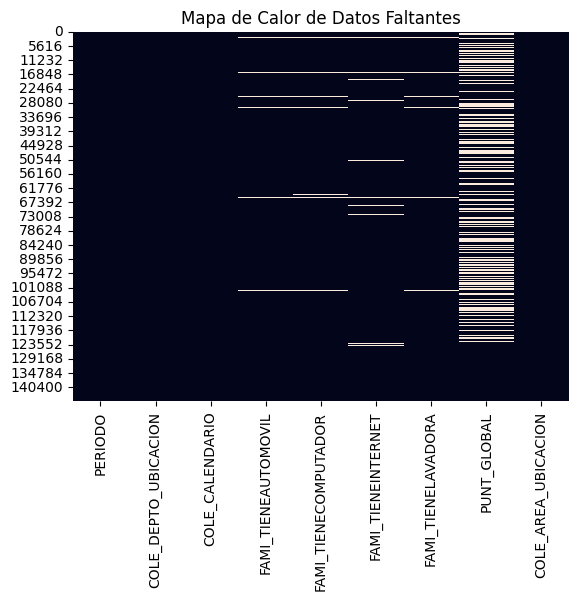

In [10]:
sns.heatmap(data_df.isnull(), cbar=False)
plt.title('Mapa de Calor de Datos Faltantes')
plt.show()

### 2.5 Imputacion variable objetivo

In [11]:
# Crear una copia del DataFrame original para trabajar sobre ella
data_df_clean = data_df.copy()
##Eliminar todos los datos que esten por debajo del periodo 20142
data_df_clean = data_df[data_df.PERIODO >= 20142]

#Análisis de completitud
(data_df_clean.isnull().sum() / data_df_clean.shape[0]).sort_values(ascending = False)


FAMI_TIENEINTERNET      0.032595
FAMI_TIENEAUTOMOVIL     0.020053
FAMI_TIENECOMPUTADOR    0.019222
FAMI_TIENELAVADORA      0.019077
PERIODO                 0.000000
COLE_DEPTO_UBICACION    0.000000
COLE_CALENDARIO         0.000000
PUNT_GLOBAL             0.000000
COLE_AREA_UBICACION     0.000000
dtype: float64

In [12]:
data_df_clean.shape

(96243, 9)

### 2.5 Imputacion variables categoricas

In [13]:
# Lista de columnas categóricas de interés
column_names = [ 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET', 
    'FAMI_TIENELAVADORA', 'PUNT_GLOBAL', 'COLE_AREA_UBICACION']
data_df_clean = data_df_clean[column_names]
# Eliminar filas donde cualquiera de estas columnas categóricas tiene un valor nulo
data_df_clean = data_df_clean.dropna(subset=column_names)
# Verificar el nuevo tamaño del DataFrame para evaluar cuántos registros se han eliminado
print(f"Original size: {data_df_clean.shape[0]}, New size after dropping nulls: {data_df_clean.shape[0]}")

Original size: 91954, New size after dropping nulls: 91954


In [ ]:
# Definir las columnas categóricas
categorical_columns = ['FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENELAVADORA']

# Iterar a través de cada columna categórica y generar gráficos
for column in categorical_columns:
    plt.figure(figsize=(18, 6))  # Ajusta el tamaño del gráfico para mejor visualización

    # Gráfico para la distribución original
    plt.subplot(1, 3, 1)
    sns.countplot(x=column, data=data_df, order=data_df[column].dropna().unique())
    plt.title('Original')

    # Gráfico después de la imputación por la moda
    plt.subplot(1, 3, 2)
    sns.countplot(x=column, data=data_df_clean, order=data_df_clean[column].dropna().unique())
    plt.title('Mode Imputation')

    # Gráfico después de la imputación iterativa
    plt.subplot(1, 3, 3)
    sns.countplot(x=column, data=data_df_numeric, order=data_df_numeric[column].dropna().unique())
    plt.title('Iterative Imputation')

    plt.suptitle(f'Distribution of {column} - Original vs. Imputed')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajuste del layout para suptitle
    plt.show()

In [14]:
data_df_clean

,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,PUNT_GLOBAL,COLE_AREA_UBICACION
1,Si,Si,Si,Si,332.0,URBANO
2,No,Si,Si,Si,257.0,URBANO
3,No,Si,No,Si,251.0,URBANO
4,No,Si,No,Si,251.0,URBANO
5,Si,Si,Si,Si,329.0,URBANO
...,...,...,...,...,...,...
146001,No,No,No,No,222.0,URBANO
146002,No,No,Si,No,245.0,URBANO
146003,No,No,No,Si,209.0,URBANO
146004,No,No,No,No,206.0,URBANO


### 2.7 Transformación Variables Dumies

In [15]:
#Variables Dummies
# Copiar el DataFrame original data_df
data_df_modeling = data_df_clean.copy()

# Obtener variables categóricas
variables_categoricas = ['FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET',
    'FAMI_TIENELAVADORA', 'COLE_AREA_UBICACION']

# Convertir variables categóricas en variables dummy y agregarlas al DataFrame copiado
for variable in variables_categoricas:
    dummies = pd.get_dummies(data_df_modeling[variable], prefix=variable, drop_first=True)
    data_df_modeling = pd.concat([data_df_modeling, dummies], axis=1)
    data_df_modeling.drop(variable, axis=1, inplace=True)

# Ver las primeras filas del DataFrame copiado con las variables dummy
data_df_modeling.head()

,PUNT_GLOBAL,FAMI_TIENEAUTOMOVIL_Si,FAMI_TIENECOMPUTADOR_Si,FAMI_TIENEINTERNET_Si,FAMI_TIENELAVADORA_Si,COLE_AREA_UBICACION_URBANO
1,332.0,True,True,True,True,True
2,257.0,False,True,True,True,True
3,251.0,False,True,False,True,True
4,251.0,False,True,False,True,True
5,329.0,True,True,True,True,True


### 2.8 Mirando nuevamente las correlaciones

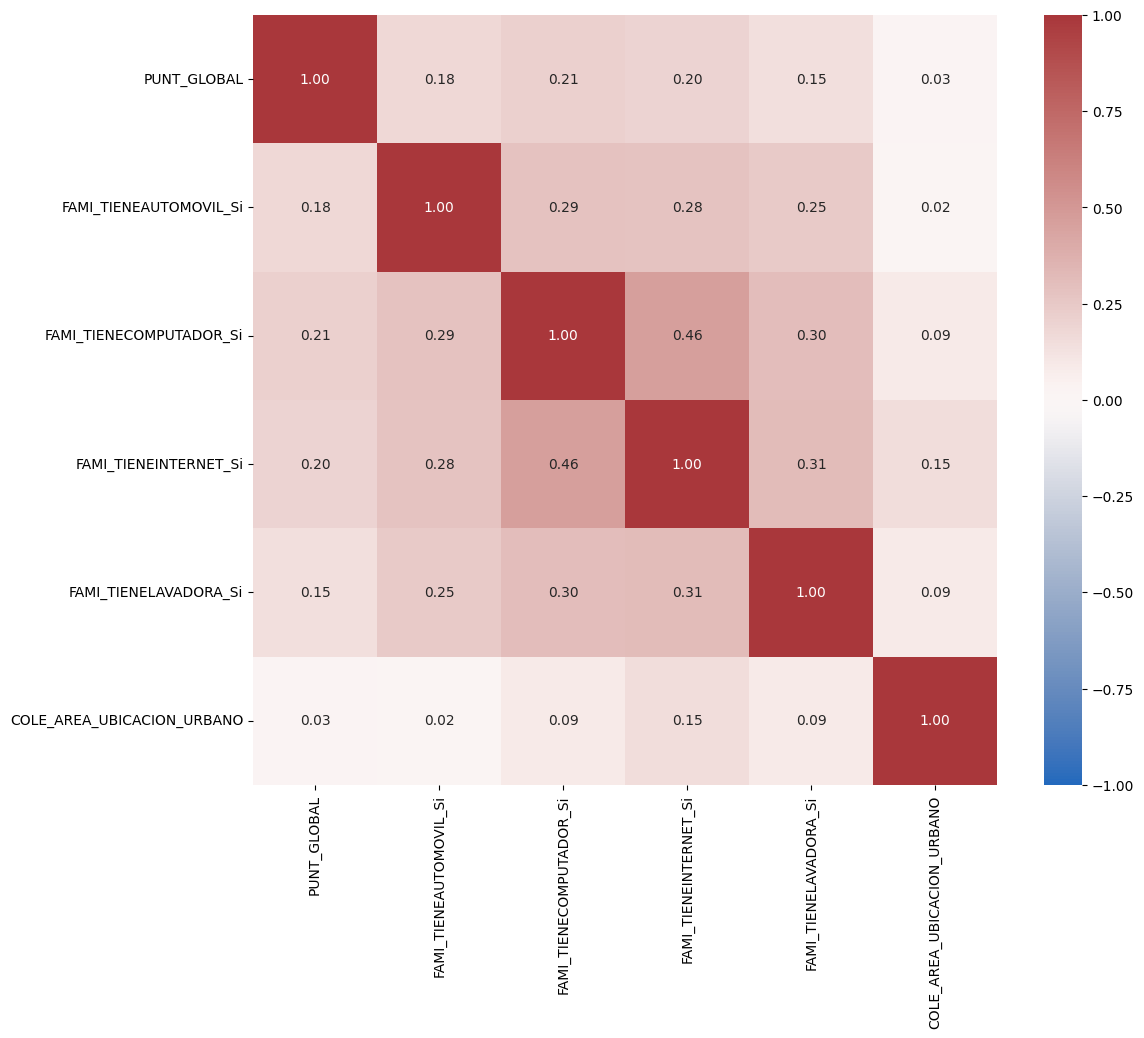

In [16]:
correlation_matrix = data_df_modeling[data_df_modeling.columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='vlag', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show()

## 2.9 Archivo Resultante

In [18]:
data_df_modeling.to_csv('clean_data.csv')